In [41]:
import pandas as pd
import numpy as np
import os
import json
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors, kneighbors_graph
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [75]:
df = pd.read_excel("healthcare_access.xlsx")
df

,Variable Label,Risk,Unnamed: 0,Domain_x,Topic_x,Variable Name,cluster_labels,age,min,max,...,Asian,Black or African American,Hispanic or Latino,Two or more races,Native Hawaiian and other Pacific Islander,White,Some other race,total,preprocessed_description,Score
0,Minority Health Social Vulnerability Index: Pe...,healthcare access risk,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,Total number of short-term community hospital ...,healthcare access risk,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Total number of short-term general hospitals w...,healthcare access risk,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,Total number of short-term general hospitals w...,healthcare access risk,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,Total number of short-term community hospitals,healthcare access risk,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Total number of short-term general hospital be...,healthcare access risk,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
64,Total number of hospitals with alcohol and/or ...,healthcare access risk,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
65,Total number of hospitals with obstetric care ...,healthcare access risk,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
66,Total number of hospitals with rehabilitative ...,healthcare access risk,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [26]:
dfn = df

In [63]:
dfn.shape

(346, 386)

In [70]:
risks = df["risk label"].unique()
grps = df.groupby("risk label")

def visualize_clusters(risk):
    risk_group = grps.get_group(risk)
    t1 = risk_group.iloc[:, 2:].to_numpy()
    wcss=[]
    for k in range(1, risk_group.shape[0]):
        kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(t1)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, risk_group.shape[0]), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()


In [67]:
grps.get_group("Technology Access Risk").shape

(19, 386)

In [51]:
column_names = [str(i) for i in range(1, 384)]

In [56]:
def generate_clusters(risk, k):
    risk_group = grps.get_group(risk)
    t1 = risk_group.iloc[:, 2:].to_numpy()
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(t1)
    labels = kmeans.labels_
    risk_group["labels"] = labels
    risk_group.drop(columns=column_names, axis=1, inplace=True)
    risk_group.to_csv(f"Cluster_{risk}_{k}.csv")
    

In [37]:
risks

array(['Educational Challenges', 'Social Environmental Risk', 'Lifestyle',
       'Transportation Risk', 'Technology Access Risk', 'Food Security',
       'Housing Challenges', 'Disease Risk', 'Climate Risk',
       'financial Risk'], dtype=object)

In [ ]:
'Educational Challenges', 'Social Environmental Risk', 'Transportation Risk', 'Lifestyle', 'financial Risk', 

In [68]:
risks[5]

'Food Security'

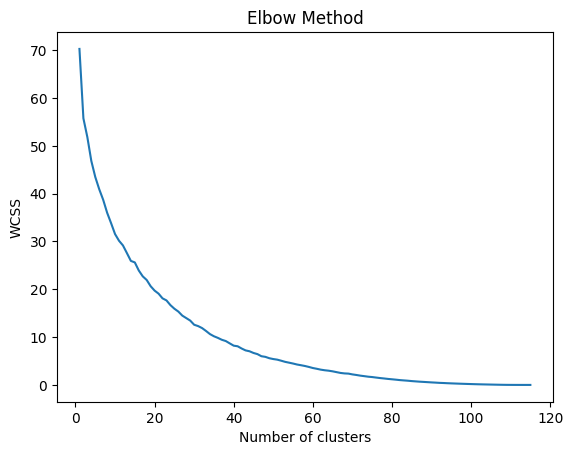

In [73]:
# Financial Challenges
risk = risks[-1]
visualize_clusters(risk)

In [74]:
generate_clusters(risk, 6)